# Flight Fare Prediction Project

As first step, we load our FlightFare_Dataset from Project Directory, using Pandas read_excel method
Then, we perform Feature Exploration and Engineering to transform our dataset
Once done, we use a Feature Selection technique to select the most important features
At this point, we train a Random Forest Regressor Model
As next step, we do hyper-parameter tuning (using RandomGridSearch) to build the best model
Finally, we export Model .pkl file back to Project Directory
Towards the end, we proceed to Model Deployment step

<div style = "background-color: orange; color: white; padding: 10px;">
    
# Loading the Dependencies   
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
dataset = pd.read_csv('a1_FlightFare_Dataset.csv')
pd.set_option('display.max_columns', None)
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


In [4]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering 

## Handling Object Data
Date_of_Journey, Dep_Time, Arrival_Time, Duration are object datatype. To derive numeric features on these, we use pandas to_datetime method to convert object data type to datetime datatype.

Attribute .dt.day will extract day from the date
Attribute .dt.month will extract month from that date

In [7]:
# Date of Journey = date of departure
dataset['journey_date'] = pd.to_datetime(dataset.Date_of_Journey, format='%d/%m/%Y').dt.day
dataset['journey_month'] = pd.to_datetime(dataset['Date_of_Journey'], format='%d/%m/%Y').dt.month
# One can always include the year but our data is only for the  year 2019
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [8]:
dataset.drop(['Date_of_Journey'], axis=1, inplace=True)# the column is now not needed

In [9]:
# Now extracting Departure time: hours and minutes
dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute
#Dropping Dep_Time column
dataset.drop(['Dep_Time'], axis =1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1812\1391623137.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_1812\1391623137.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute


In [10]:
# Extracting Arrival Time: hours and Minutes
dataset['arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute
dataset.drop(['Arrival_Time'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1812\2615425350.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_1812\2615425350.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute


In [11]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
#Duration calculations
#Assigning and converting duration column into list, for looping through
duration = list(dataset["Duration"])
# In table above, Row Index=2, we have Duration = 19h (missing minutes)
# Looping through all duration values
# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add duration_hours and duration_mins list to our dataset df
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
dataset.drop(["Duration"], axis = 1, inplace = True)
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical data

**`Airline`, `Source`, `Destination`, `Route`, `Total_Stops`, `Additional_Info` are all categorical.** One can find many ways to handle categorical data, like:
1. <span style="color: blue;">**Nominal data**</span> --> data is not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data is in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [13]:
# Feature engineering on Airline 
dataset['Airline'].value_counts()

Airline
Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [14]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
import pandas as pd
Airline = dataset[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_1812\376126004.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Airline
Jet Airways          3598
IndiGo               1927
Air India            1632
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: count, dtype: int64

In [15]:
Airline = pd.get_dummies(Airline, drop_first=True)
Airline = Airline.astype(int)      
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [16]:
# Feature engineering on Source
dataset['Source'].value_counts()

Source
Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: count, dtype: int64

In [17]:
#It is also a Norminal Categorical dataset and we will use OneHot Encoding
Source = dataset[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source = Source.astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
# Feature Engineering on Destination
dataset['Destination'].value_counts()

Destination
Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: count, dtype: int64

In [19]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination = Destination.astype(int)
Destination.head()

C:\Users\user\AppData\Local\Temp\ipykernel_1812\2258202616.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [20]:
#Additional_info contains almost 80% no_info
# Route and Total stop are related
dataset.drop(['Route', 'Additional_Info'], axis=1, inplace = True)

In [21]:
#Feature Engineering on Total_Stops
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: count, dtype: int64

In [22]:
dataset.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [23]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis=1)
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace= True)
data_train.head()

,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods:


1. <span style="color: purple;">**feature_importance_**</span>: To check for relative feature importance
2. <span style="color: purple;">**Variable Inflation Factor (VIF)**</span>: To check for multicollinearity

In [24]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_date', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [25]:
X = data_train.loc[:, ['Total_Stops', 'journey_date', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]
print(X.shape, y.shape)

(10000, 25) (10000,)


### Feature Importance

In [26]:
#Important faetures using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

print(selection.feature_importances_)

[0.2434881  0.14314213 0.06512463 0.02937954 0.02463957 0.03331628
 0.02406018 0.14682153 0.01999125 0.00877862 0.00144109 0.01275605
 0.10377338 0.01698331 0.02652207 0.0046071  0.00331649 0.00138332
 0.02364017 0.01082639 0.01524126 0.00743211 0.02761779 0.00391817
 0.00179949]


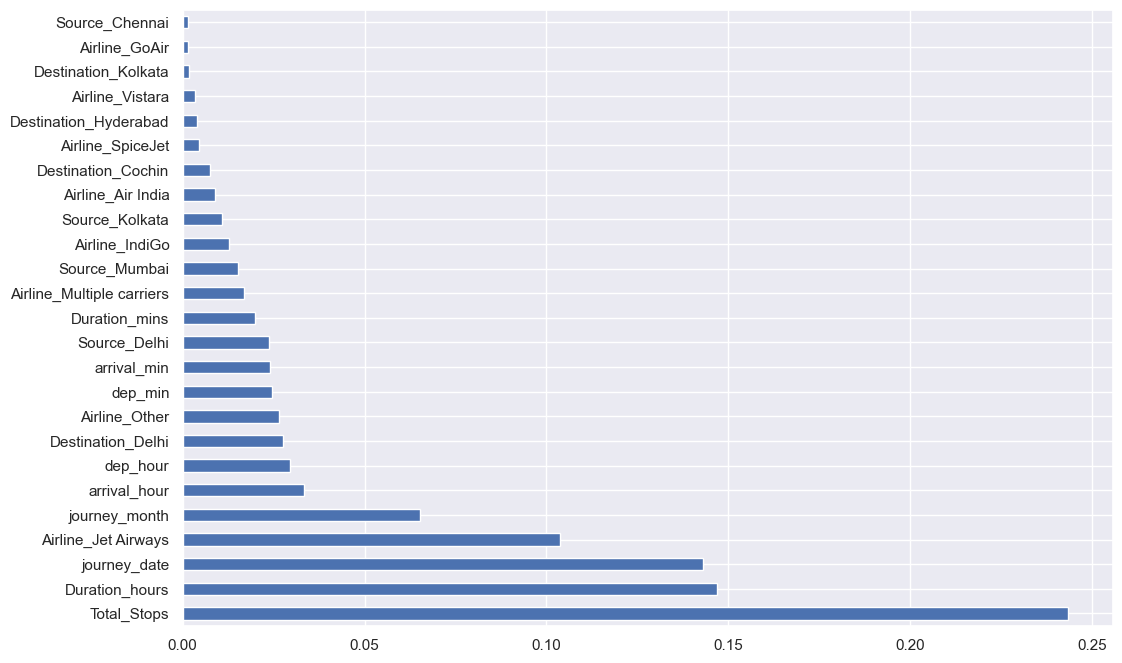

In [27]:
#plot graph of feature Importances for better visualization
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## VIF - Multicollinearity


**Variance Inflation Factor (VIF)** in Machine Learning:
The Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in features in a dataset, especially in linear models. Multicollinearity occurs when one feature is highly linearly correlated with one or more other features. This can lead to instability in the model's coefficient estimates, making it harder to interpret the importance of individual features.

If VIF = 1 then there's no correlation btwn the feature and others
if 1 < VIF < 5 then correlation is moderate/acceptable..
anything five and above is significant and data preprocessing like combining features may be necessary



In [28]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif['variable'] = z.columns
    vif['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [29]:
#computing vif on x
calc_vif(X)

,variable,VIF
0,Total_Stops,7.533035
1,journey_date,3.511805
2,journey_month,16.470796
3,dep_hour,5.790951
4,dep_min,2.804206
5,arrival_hour,4.923106
6,arrival_min,3.455823
7,Duration_hours,6.183394
8,Duration_mins,4.106901
9,Airline_Air India,5.381726


In [30]:
#Dropping Source_Delhi coz 16 is just way to high
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Total_Stops                10000 non-null  int64
 1   journey_date               10000 non-null  int32
 2   journey_month              10000 non-null  int32
 3   dep_hour                   10000 non-null  int32
 4   dep_min                    10000 non-null  int32
 5   arrival_hour               10000 non-null  int32
 6   arrival_min                10000 non-null  int32
 7   Duration_hours             10000 non-null  int64
 8   Duration_mins              10000 non-null  int64
 9   Airline_Air India          10000 non-null  int32
 10  Airline_GoAir              10000 non-null  int32
 11  Airline_IndiGo             10000 non-null  int32
 12  Airline_Jet Airways        10000 non-null  int32
 13  Airline_Multiple carriers  10000 non-null  int32
 14  Airline_Other              

In [31]:
X['Source_Delhi'].value_counts()

Source_Delhi
0    5743
1    4257
Name: count, dtype: int64

# Model Training

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor(
    n_estimators=1300,
    learning_rate= 0.01,
    max_depth = 8,
    min_child_weight = 5,
    gamma = 0.3,
    subsample = 0.8,
    colsample_bytree = 0.8
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xgb_r2test = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = metrics.mean_absolute_error(y_test, y_pred)

print(f'R2 score for the model is: {xgb_r2test:.4f}')
print(f'MSE for the model is: {xgb_mse:.4f}')
print(f'RMSE for the model is: {np.sqrt(xgb_mse):.4f}')
print(f'MAE for the model is: {xgb_mae:.4f}')

R2 score for the model is: 0.8630
MSE for the model is: 2722198.7317
RMSE for the model is: 1649.9087
MAE for the model is: 1145.2887


In [33]:
'''
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [500, 1000, 1100, 1200, 1300, 1400, 1500, 2000],
    'learning_rate': [0.001, 0.01, 0.02, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]

}

xgb_clf = xgb.XGBRegressor()
random_search = RandomizedSearchCV(
    estimator = xgb_clf,
    param_distributions = param_grid,
    n_iter = 30,
    scoring = 'neg_mean_squared_error',
    cv=4,
    verbose = 1,
    random_state = 519,
    n_jobs = -1
)
random_search.fit(X_train, y_train)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_}")
'''

'\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import RandomizedSearchCV\nimport xgboost as xgb\n\nparam_grid = {\n    \'n_estimators\': [500, 1000, 1100, 1200, 1300, 1400, 1500, 2000],\n    \'learning_rate\': [0.001, 0.01, 0.02, 0.05, 0.1, 0.2],\n    \'max_depth\': [3, 4, 5, 6, 7, 8, 9],\n    \'min_child_weight\': [1, 3, 5, 7],\n    \'gamma\': [0, 0.1, 0.2, 0.3, 0.4],\n    \'subsample\': [0.6, 0.7, 0.8, 1],\n    \'colsample_bytree\': [0.6, 0.7, 0.8, 0.9, 1.0]\n\n}\n\nxgb_clf = xgb.XGBRegressor()\nrandom_search = RandomizedSearchCV(\n    estimator = xgb_clf,\n    param_distributions = param_grid,\n    n_iter = 30,\n    scoring = \'neg_mean_squared_error\',\n    cv=4,\n    verbose = 1,\n    random_state = 519,\n    n_jobs = -1\n)\nrandom_search.fit(X_train, y_train)\nprint(f"Best Hyperparameters: {random_search.best_params_}")\nprint(f"Best Accuracy: {random_search.best_score_}")\n'

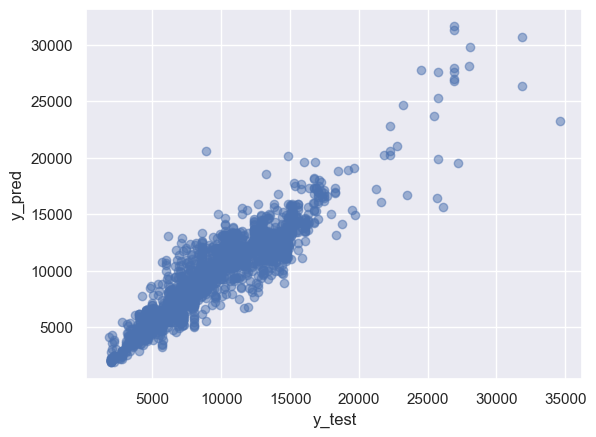

In [34]:
#Plotting performance graph
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [35]:
# Save Model as plk
import pickle
if xgb_model is not None:
    with open('c1_flight_xgb.pkl', 'wb') as file:
        pickle.dump(xgb_model, file)
else:
    print("The model is empty. Please train or load a valid model.")
